In [1]:

!pip install pybind11>=2.12



    sys-platform (=="darwin") ; extra == 'objc'
                 ~^


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings
warnings.filterwarnings("ignore")

2024-11-13 10:04:11.001375: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 10:04:11.027812: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 10:04:11.235993: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-13 10:04:11.677585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731472451.883369    5903 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731472451.94

In [3]:
train_data_dir = '/home/dhruv/Downloads/cifar-10-img/train'
test_data_dir = '/home/dhruv/Downloads/cifar-10-img/test'

In [4]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 20000
test_batch_size = 2000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(32, 32),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    shuffle=True,  # Shuffle the order of images during testing
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [5]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [6]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (20000, 32, 32, 3)
Shape of y_train (20000, 10)
Shape of x_test  (2000, 32, 32, 3)
Shape of y_test  (2000, 10)


In [7]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [8]:
x_train.shape[1:]

(32, 32, 3)

In [9]:
from tensorflow.keras import layers


In [10]:
# Create a list of layers
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(10, activation='softmax')
])

2024-11-13 10:05:40.426389: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
from tensorflow.keras.optimizers import SGD
# Compile the model
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
              batch_size=20,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 127s 123ms/step - accuracy: 0.3196 - loss: 1.8991 - val_accuracy: 0.4440 - val_loss: 1.5858
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 110ms/step - accuracy: 0.5091 - loss: 1.3638 - val_accuracy: 0.5820 - val_loss: 1.2057
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 97s 97ms/step - accuracy: 0.5818 - loss: 1.1587 - val_accuracy: 0.6040 - val_loss: 1.1140
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 123s 123ms/step - accuracy: 0.6338 - loss: 1.0205 - val_accuracy: 0.5985 - val_loss: 1.1335
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 104s 104ms/step - accuracy: 0.6749 - loss: 0.9077 - val_accuracy: 0.6315 - val_loss: 1.0657
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 100s 100ms/step - accuracy: 0.7151 - loss: 0.7982 - val_accuracy: 0.5810 - val_loss: 1.2534
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 102s 102ms/step - accuracy: 0.7458 - loss: 0.7179 - val_accuracy: 0.6795 - val_loss: 0.9545
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 101s 101ms/step - accu

<Axes: >

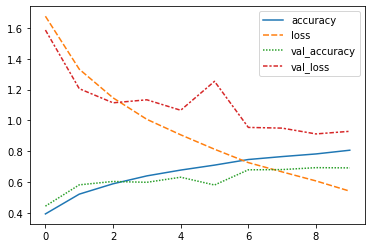

In [12]:
import seaborn as sns
sns.lineplot(model.history.history)

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6949 - loss: 0.9226
Loss:  0.9292525053024292
Accuracy:  0.6919999718666077


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


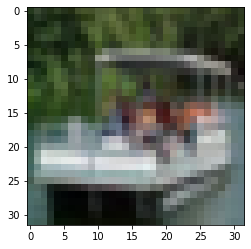

ship


In [14]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[50])
plt.show()
print(class_names[np.argmax(predicted_value[50], axis=0)])